In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

Data frames for states

In [2]:
dfCases = pd.read_csv('../data/Casos_Diarios_Estado_Nacional_Confirmados_20210620.csv')

Determinating the size of the cases dataframe

In [3]:
numStates,locLastDateCases=dfCases.shape

Remove the national numbers from the dataframes

In [4]:
dfCases = dfCases.query("nombre != 'Nacional'").copy()

Top 10 states with high populations

In [5]:
dfCases['total_cases'] = dfCases.iloc[:,3:locLastDateCases].sum(axis=1)

In [6]:
dfCases['cases_rate'] = (dfCases['total_cases']/dfCases['poblacion'])*100000

In [7]:
dfCases['total_cases_last_60_days'] = dfCases.iloc[:,locLastDateCases-59:locLastDateCases].sum(axis=1)

In [8]:
dfCases['cases_rate_last_60_days'] =(dfCases['total_cases_last_60_days']/ dfCases['poblacion'])*100000 #using as reference the las day

In [9]:
dfCasesInfo = dfCases.loc[:,['nombre','poblacion','total_cases','cases_rate','total_cases_last_60_days','cases_rate_last_60_days']].copy()

Covid deaths analyzes

In [10]:
dfDeaths = pd.read_csv('../data/Casos_Diarios_Estado_Nacional_Defunciones_20210620.csv')

Determinating the size of the deaths dataframe

In [11]:
numStates,locLastDateDeaths=dfDeaths.shape

Remove the national numbers from the dataframes

In [12]:
dfDeaths = dfDeaths.query("nombre != 'Nacional'").copy()

In [13]:
dfDeaths['total_deaths'] = dfDeaths.iloc[:,3:locLastDateDeaths].sum(axis=1)

In [14]:
dfDeaths['deaths_rate'] = (dfDeaths['total_deaths']/dfDeaths['poblacion'])*100000 #total/population*100,000

In [15]:
dfDeaths['deaths_rate'] = (dfDeaths['total_deaths']/dfDeaths['poblacion'])*100000 #total/population*100,000

In [16]:
dfDeaths['total_deaths_last_60_days'] = dfDeaths.iloc[:,locLastDateDeaths-59:locLastDateDeaths].sum(axis=1)

In [17]:
dfDeaths['deaths_rate_last_60_days'] = (dfDeaths.loc[:,'total_deaths_last_60_days']/dfDeaths.loc[:,'poblacion'])*100000

In [18]:
dfCases.rename(columns = {'nombre': 'state', 'poblacion': 'population'}, inplace=True)
dfDeaths.rename(columns = {'nombre': 'state', 'poblacion': 'population'}, inplace=True)

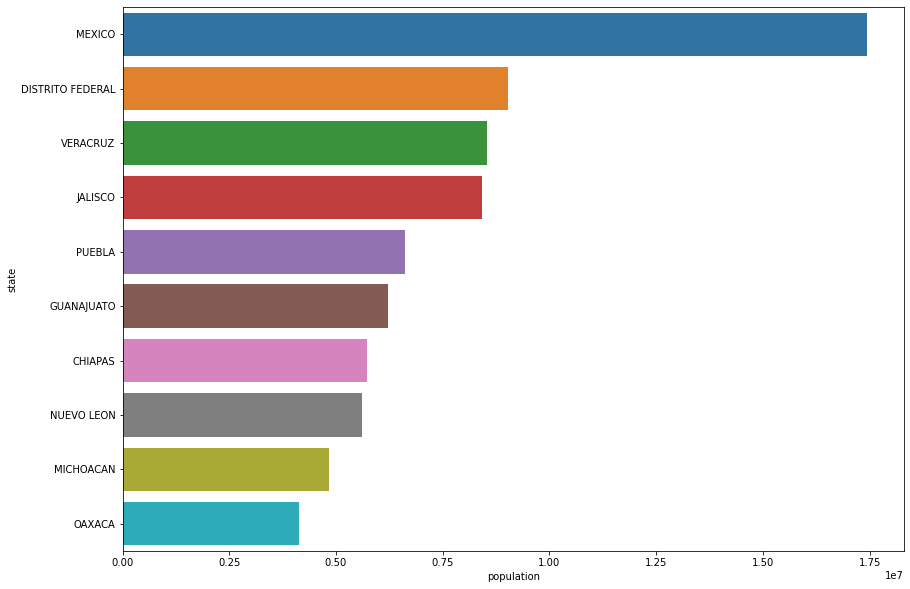

In [19]:
plt.figure(figsize=(14,10))
top10largestPopulations = sns.barplot(x="population", y="state", data=dfCases.nlargest(10, 'population').copy())
top10largestPopulations = top10largestPopulations.get_figure()
sns.set_context('paper', font_scale=2)
top10largestPopulations.savefig("../resultsStates/top10largestPopulations.png")

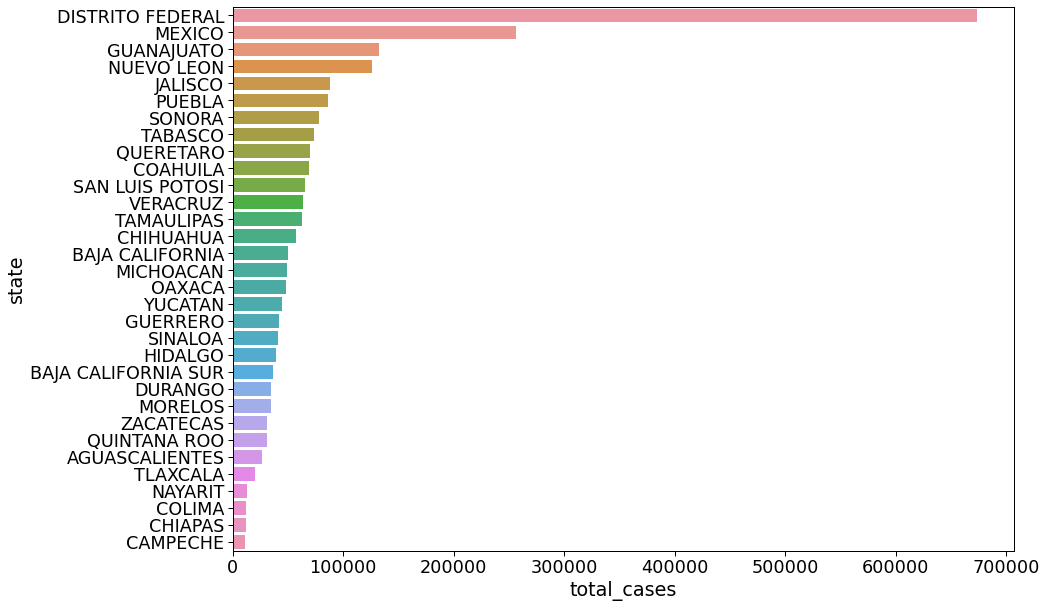

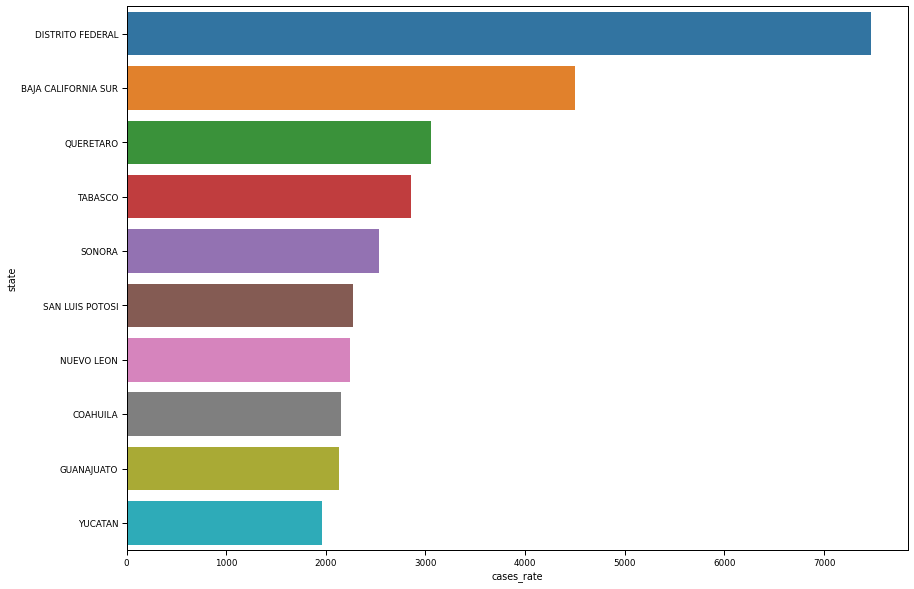

In [38]:
dfCasesSorted = dfCases
dfCasesSorted.sort_values('total_cases',inplace=True, ascending=False)
plt.figure(figsize=(14,10))
totalCases = sns.barplot(x="total_cases", y="state", data=dfCasesSorted)
totalCases = totalCases.get_figure()
sns.set_context('paper', font_scale=1)
totalCases.savefig("../resultsStates/total_cases.png")

dfCasesSorted.sort_values('cases_rate',inplace=True, ascending=False)
plt.figure(figsize=(14,10))
casesRate = sns.barplot(x="cases_rate", y="state", data=dfCasesSorted.nlargest(10, 'cases_rate').copy())
casesRate = casesRate.get_figure()
sns.set_context('paper', font_scale=2) 
casesRate.savefig("../resultsStates/cases_rate.png")

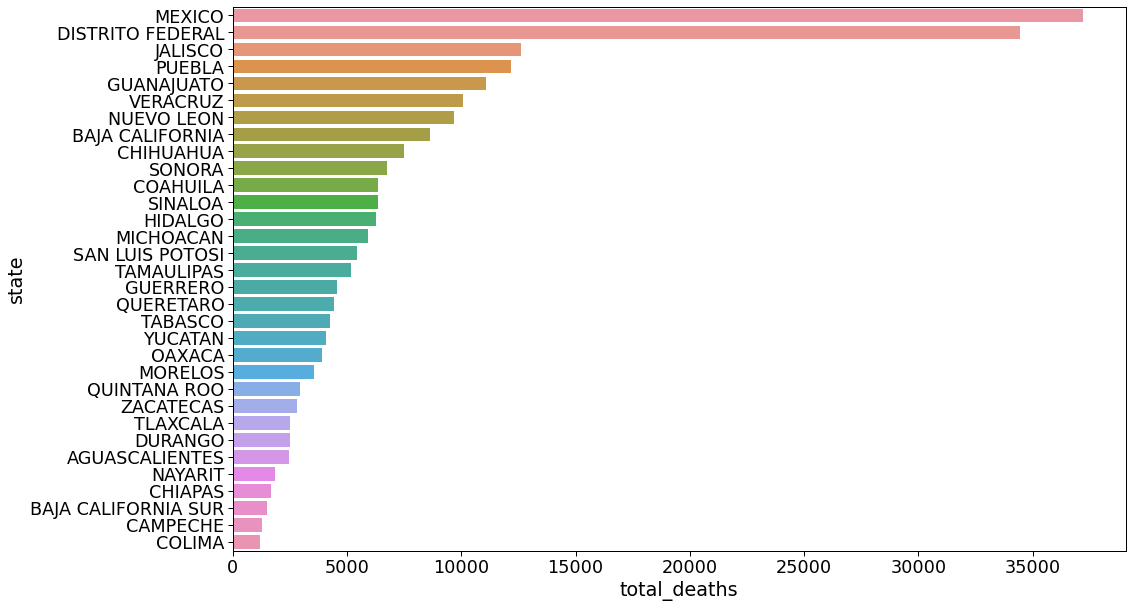

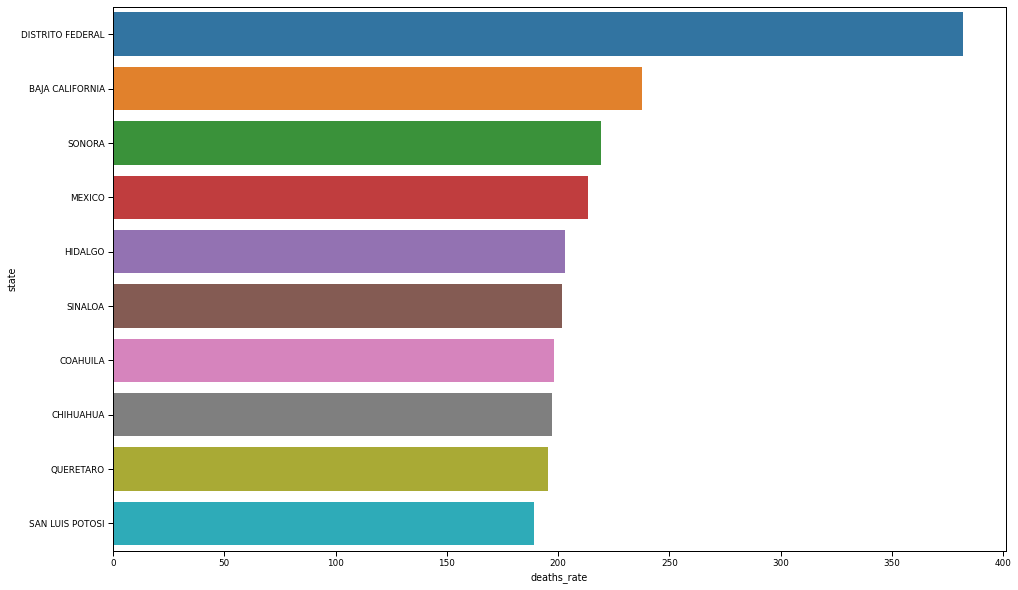

In [39]:
dfDeathsSorted = dfDeaths

dfDeathsSorted.sort_values('total_deaths',inplace=True, ascending=False)
plt.figure(figsize=(16,10))
totalDeaths = sns.barplot(x="total_deaths", y="state", data=dfDeathsSorted)
totalDeaths = totalDeaths.get_figure()
sns.set_context('paper', font_scale=1) 
totalDeaths.savefig("../resultsStates/total_deaths.png")

dfDeathsSorted.sort_values('deaths_rate',inplace=True, ascending=False)
plt.figure(figsize=(16,10))
deathsRate = sns.barplot(x="deaths_rate", y="state", data=dfDeathsSorted.nlargest(10, 'deaths_rate').copy())
deathsRate = deathsRate.get_figure()
sns.set_context('paper', font_scale=2)
deathsRate.savefig("../resultsStates/deaths_rate.png")

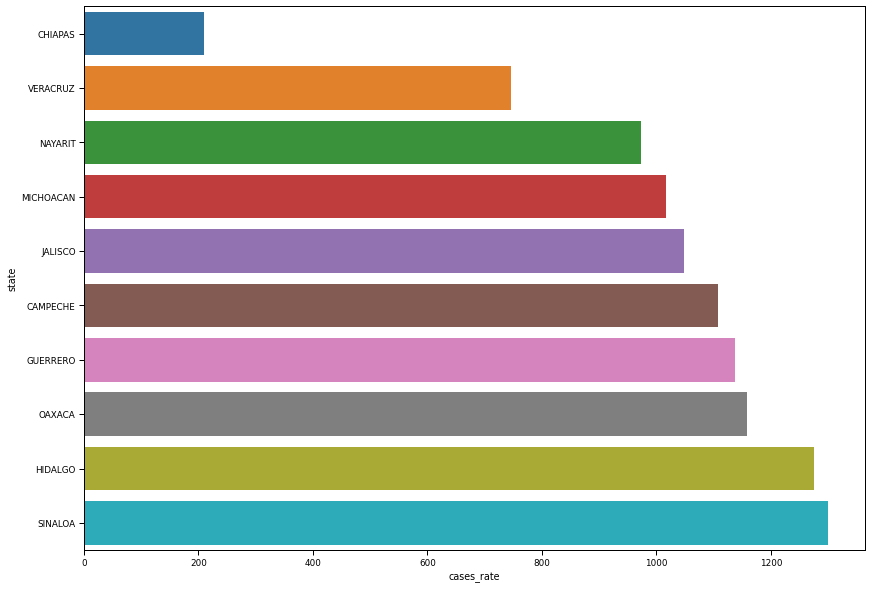

In [22]:
plt.figure(figsize=(14,10))
top10smallestCasesRate = sns.barplot(x="cases_rate", y="state", data=dfCases.nsmallest(10, 'cases_rate').copy())
top10smallestCasesRate = top10smallestCasesRate.get_figure()
sns.set_context('paper', font_scale=2)
top10smallestCasesRate.savefig("../resultsStates/top10smallestCasesRate.png")

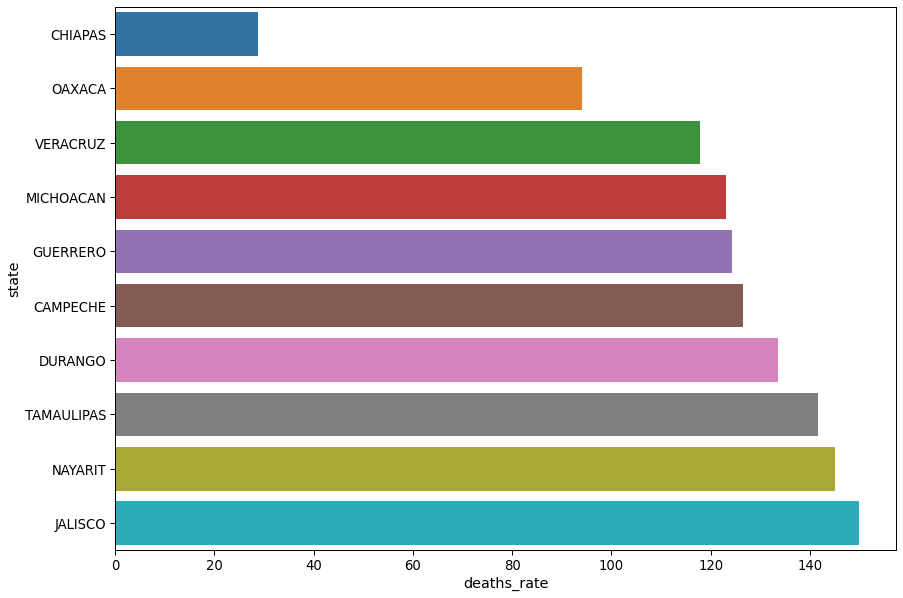

In [42]:
plt.figure(figsize=(14,10))
top10smallestDeathsRate = sns.barplot(x="deaths_rate", y="state", data=dfDeaths.nsmallest(10, 'deaths_rate').copy())
top10smallestDeathsRate = top10smallestDeathsRate.get_figure()
sns.set_context('paper', font_scale=1)
top10smallestDeathsRate.savefig("../resultsStates/top10smallestDeathsRate.png")

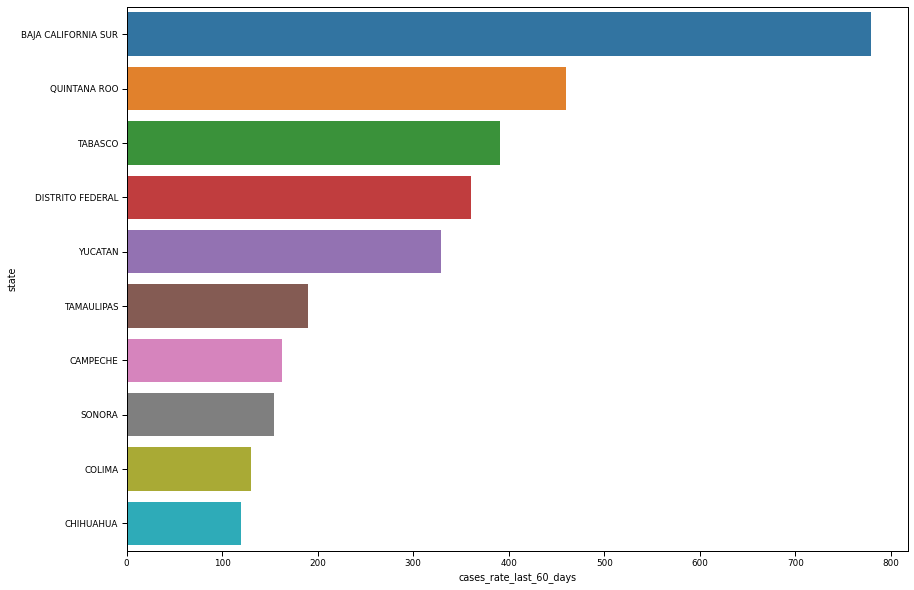

In [43]:
plt.figure(figsize=(14,10))
top10casesRate60 = sns.barplot(x="cases_rate_last_60_days", y="state", data=dfCases.nlargest(10,'cases_rate_last_60_days').copy())
sns.set_context('paper', font_scale=1)
top10casesRate60 = top10casesRate60.get_figure()
top10casesRate60.savefig("../resultsStates/top10casesRateLast60days.png")

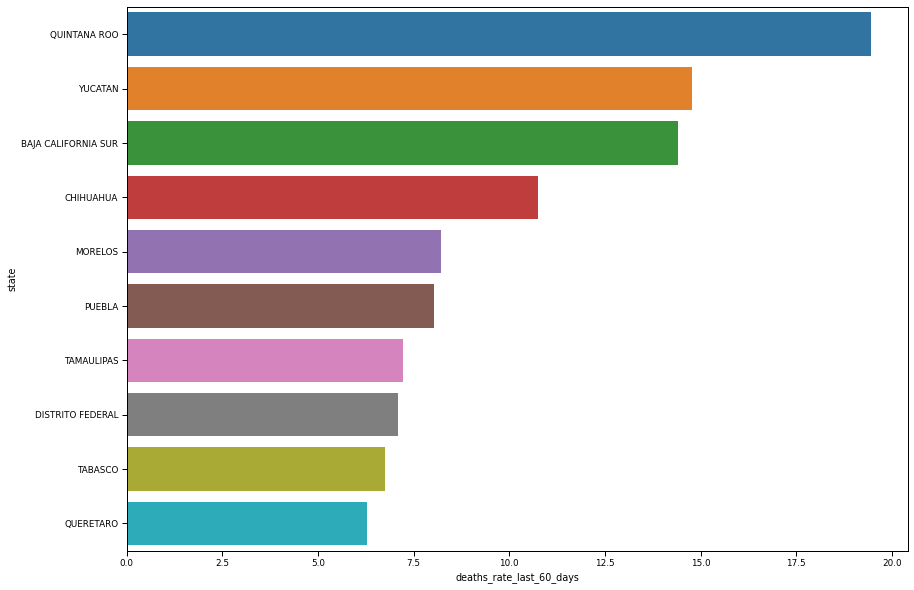

In [44]:
plt.figure(figsize=(14,10))
top10deathsRate60 = sns.barplot(x="deaths_rate_last_60_days", y="state", data=dfDeaths.nlargest(10,'deaths_rate_last_60_days').copy())
top10deathsRate60 = top10casesRate60.get_figure()        
sns.set_context('paper', font_scale=1)
top10deathsRate60 = top10deathsRate60.savefig("../resultsStates/top10deathsRateLast60days.png")

In [26]:
dfAll = pd.merge(dfCases,dfDeaths,on='state')

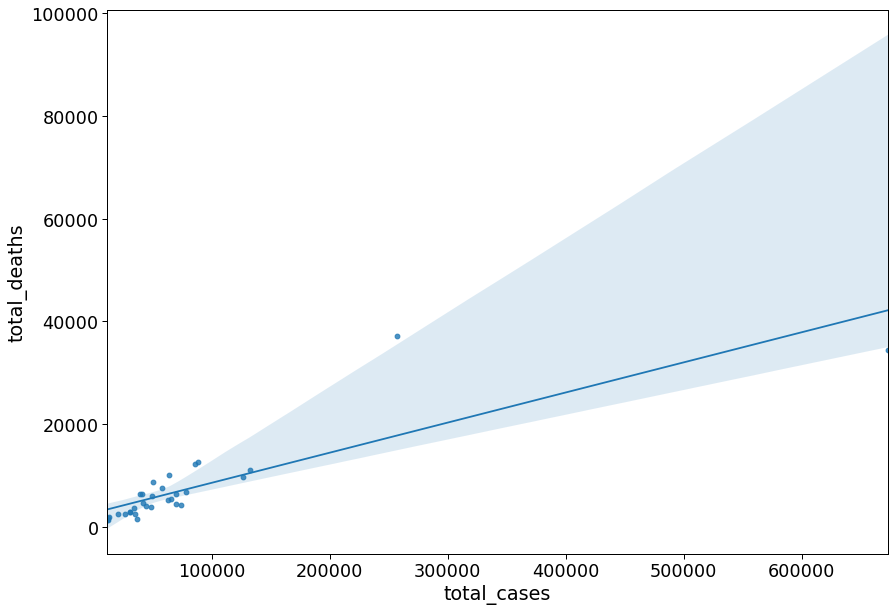

In [27]:
plt.figure(figsize=(14,10))
totalCasesDeaths = sns.regplot(x="total_cases", y="total_deaths", data=dfAll)
totalCasesDeaths = totalCasesDeaths.get_figure()
sns.set_context('paper', font_scale=2)
totalCasesDeaths.savefig("../resultsStates/totalDeaths-totalDeaths.png")

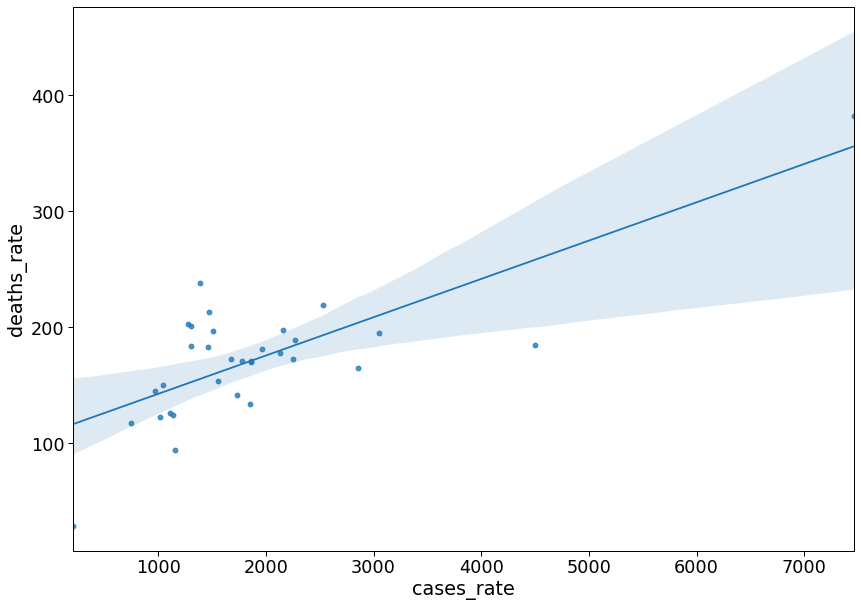

In [28]:
plt.figure(figsize=(14,10))
casesDeathsRate = sns.regplot(x="cases_rate", y="deaths_rate", data=dfAll)
casesDeathsRate = casesDeathsRate.get_figure()
sns.set_context('paper', font_scale=2)
casesDeathsRate.savefig("../resultsStates/deathsRate-casesRate.png")

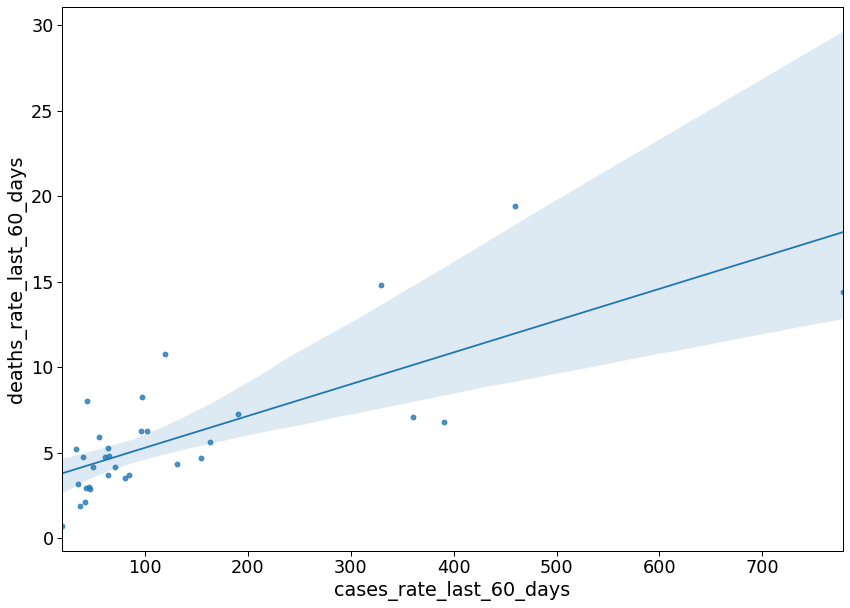

In [29]:
plt.figure(figsize=(14,10))
deathsCasesRate60 = sns.regplot(x="cases_rate_last_60_days", y="deaths_rate_last_60_days", data=dfAll)
deathsCasesRate60  = deathsCasesRate60 .get_figure()
sns.set_context('paper', font_scale=2)
deathsCasesRate60.savefig("../resultsStates/deathsRate60-casesRate60.png")


In [30]:
dfFinal = dfAll.loc[:,['state','population_x','total_cases','cases_rate','cases_rate_last_60_days','total_deaths','deaths_rate','deaths_rate_last_60_days']].copy()

In [31]:
dfFinal.rename(columns = {'nombre': 'state', 'population_x': 'population'}, inplace=True)
dfFinal.sort_values(by=['state'], ascending = True, inplace=True)
dfFinal

,state,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
10,AGUASCALIENTES,1434635,26694,1860.682334,55.275384,2456,171.193370,5.924852
20,BAJA CALIFORNIA,3634868,50278,1383.213916,64.624080,8648,237.917856,4.786969
1,BAJA CALIFORNIA SUR,804708,36223,4501.384353,778.667542,1486,184.663257,14.415167
26,CAMPECHE,1000617,11081,1107.416724,162.699614,1265,126.421998,5.596547
31,CHIAPAS,5730367,12050,210.283216,19.108724,1654,28.863771,0.715486
17,CHIHUAHUA,3801487,57483,1512.118810,119.505867,7493,197.107079,10.758948
7,COAHUILA,3218720,69382,2155.577372,41.755729,6376,198.091167,2.081573
16,COLIMA,785153,12203,1554.219369,130.547804,1210,154.110091,4.330366
0,DISTRITO FEDERAL,9018645,673343,7466.121574,360.187146,34458,382.075134,7.096410
12,DURANGO,1868996,34588,1850.619263,63.403025,2495,133.494133,3.691822


In [32]:
#dfFinal.to_csv('../data/week1analyzes.csv',index=False)